In [165]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda

In [173]:
X = np.load("pedtrainset.npy")
X = X.T/255
y = np.load("pedtrainlabels.npy")
test_set = np.load("pedtestset.npy")
Y_test = test_set.T/255
test_set_labels = np.load("pedtestlabels.npy")

In [167]:
w = np.zeros((X.shape[0], 1))
b = 0.0

In [168]:
custo = []

In [169]:
@jit(target_backend='cuda')
def fit(X, Y, w, b, learning_rate=0.001):
    z = w.T.dot(X)+b
    a = 1/(1+np.exp(-z)) 
    cost = -(np.mean(y*np.log(a)+(1-y)*np.log(1-a)))
    dz = a-y
    dw = 1/X.shape[1]*np.dot(X, dz.T) 
    db = 1/X.shape[1]*np.sum(dz)
    return w+learning_rate*dw, b+learning_rate*db, cost

In [170]:
for i in range(50):
    w, b, cost = fit(X, y, w, b)
    custo.append(cost)

In [171]:
custo

[0.6931471805593794,
 0.6938256435410766,
 0.6945470222542258,
 0.695314763866954,
 0.6961325898871392,
 0.6970045169836054,
 0.6979348791678468,
 0.6989283513811316,
 0.6999899745232807,
 0.7011251819484225,
 0.7023398274392364,
 0.7036402146538614,
 0.7050331280183968,
 0.7065258650118924,
 0.7081262697596674,
 0.7098427678138916,
 0.7116844019569758,
 0.7136608688127551,
 0.7157825559925736,
 0.7180605794373909,
 0.7205068205425018,
 0.723133962569076,
 0.725955525755831,
 0.7289859004463984,
 0.7322403774434831,
 0.7357351746928213,
 0.7394874592893699,
 0.7435153636901362,
 0.7478379949154359,
 0.7524754354298435,
 0.7574487343211591,
 0.7627798873484166,
 0.7684918044163552,
 0.7746082630623671,
 0.7811538466221173,
 0.7881538658800635,
 0.7956342632189286,
 0.8036214985626271,
 0.81214241676376,
 0.8212240965191479,
 0.8308936813974424,
 0.8411781941241208,
 0.8521043358720236,
 0.8636982729292907,
 0.8759854137338755,
 0.8889901798438254,
 0.9027357749201445,
 0.917243956203651

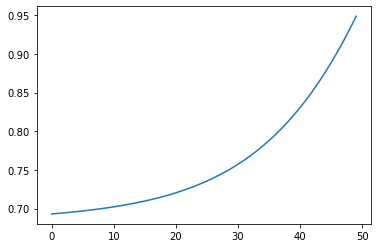

In [172]:
plt.plot(custo)
plt.show()

In [146]:
w

array([[0.005409  ],
       [0.00537964],
       [0.0053351 ],
       [0.00529187],
       [0.00529841],
       [0.00533912],
       [0.00532629],
       [0.00528849],
       [0.00525836],
       [0.0052825 ],
       [0.00531989],
       [0.00531924],
       [0.00528627],
       [0.00525105],
       [0.00525425],
       [0.00528667],
       [0.0053109 ],
       [0.00534496],
       [0.00536182],
       [0.00532497],
       [0.00527666],
       [0.00524415],
       [0.00524787],
       [0.00524836],
       [0.00524222],
       [0.00517057],
       [0.00511433],
       [0.0051192 ],
       [0.00517802],
       [0.00519859],
       [0.00517279],
       [0.00515953],
       [0.00518144],
       [0.00521798],
       [0.00524409],
       [0.00528555],
       [0.00530168],
       [0.00526121],
       [0.00520912],
       [0.00517209],
       [0.00513268],
       [0.00510035],
       [0.00507846],
       [0.00500166],
       [0.0049433 ],
       [0.00495539],
       [0.00500374],
       [0.005

In [147]:
b

0.005589647965184611

In [87]:
def predict(x_pred, w, b):
    return 1/(1+np.exp(-(w.T.dot(x_pred)+b)))

In [174]:
y[0]

1

In [175]:
X.T[0].shape

(648,)

In [174]:
for i in range(10):
    print(predict(Y_test.T[i], w, b))

[0.77598255]
[0.76606435]
[0.78633559]
[0.78929152]
[0.80499556]
[0.75829662]
[0.75993447]
[0.76447375]
[0.63313011]
[0.76109356]


In [175]:
for i in range(10):
    print(test_set_labels[i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
